# Import

In [1]:
import torchvision.models
from fastai.callbacks import *
from fastai.vision import *

In [2]:
sys.path.append('../../')

In [3]:
from deoldify.data import *
from deoldify.models import *

In [4]:
import warnings
warnings.filterwarnings('ignore')

# Config

In [5]:
#export
dir_data = Path('/home/blaberj/justinblaber/deoldify/data')
dir_imgs = dir_data/'imgs'
dir_colr = dir_imgs/'colr'
dir_gray = dir_imgs/'gray'

# Utility

# Train

In [6]:
loss = FeatureLoss(encoder=torchvision.models.vgg16(pretrained=True).features,
                   sz=224, # Size is used to find layers which change size, so keep this constant
                   idx_styl=[0,1,2,3,4],
                   idx_cont=[0,1,2,3,4],
                   w_styl=[0,0,0,0,0],
                   w_cont=[0,0,0,0,0],
                   w_colr=1,
                   w_gray=0)

In [7]:
src = get_src()

In [8]:
def _get_data_learn(batch_size, sz):
    data = get_data(src, batch_size, sz)
    
    learn = unet_learner(data,
                         models.resnet34,
                         loss_func=loss, 
                         callback_fns=LossMetrics,
                         blur=True,
                         norm_type=NormType.Weight,
                         model_dir=Path.cwd()/'checkpoints')

    return data, learn

Stage 1

In [9]:
data, learn = _get_data_learn(batch_size=64, sz=54)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


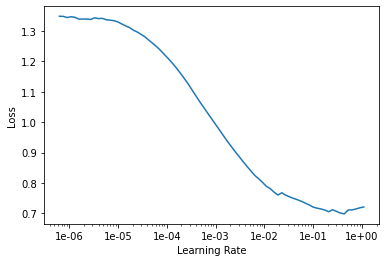

In [10]:
learn.lr_find()
learn.recorder.plot()

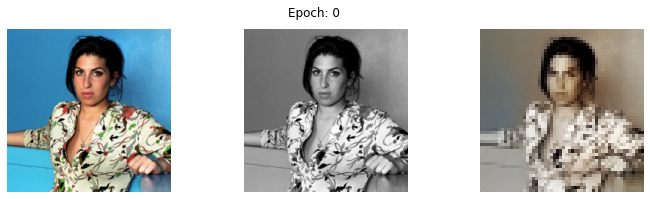

In [11]:
learn.fit_one_cycle(1, slice(1e-3), callbacks=[DisplayResultsCallback(learn, dir_data/'winehouse.png')])

In [12]:
learn.save('stage1a')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


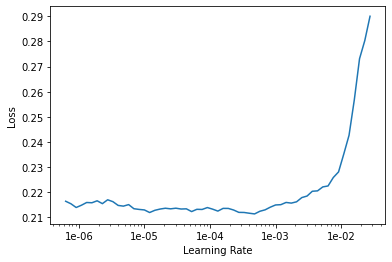

In [13]:
learn.load('stage1a')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

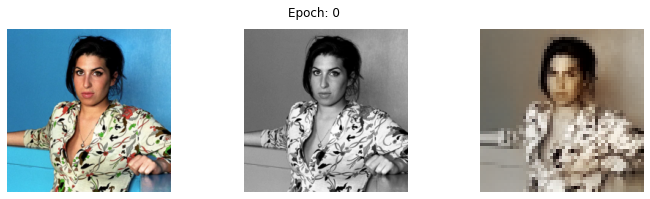

In [14]:
learn.fit_one_cycle(1, slice(1e-6,1e-4), callbacks=[DisplayResultsCallback(learn, dir_data/'winehouse.png')])

In [15]:
learn.save('stage1b')

Stage 2

In [16]:
data, learn = _get_data_learn(batch_size=32, sz=112)

In [17]:
learn.load('stage1b');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


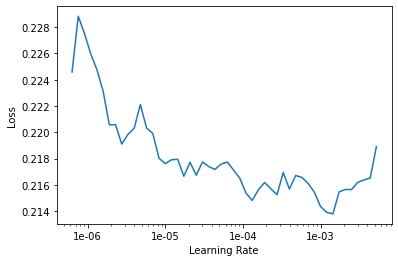

In [18]:
learn.lr_find()
learn.recorder.plot()

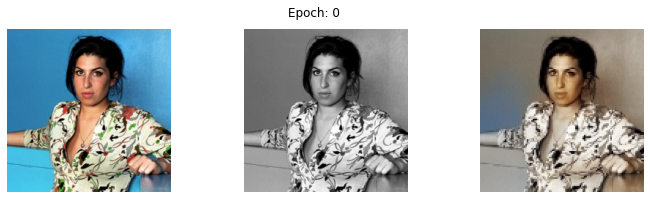

In [19]:
learn.fit_one_cycle(1, slice(1e-4), callbacks=[DisplayResultsCallback(learn, dir_data/'winehouse.png')])

In [20]:
learn.save('stage2a')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


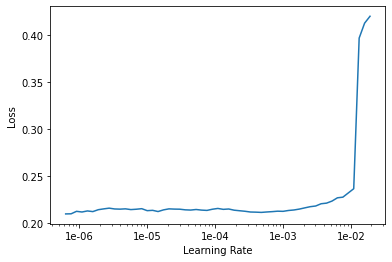

In [21]:
learn.load('stage2a')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

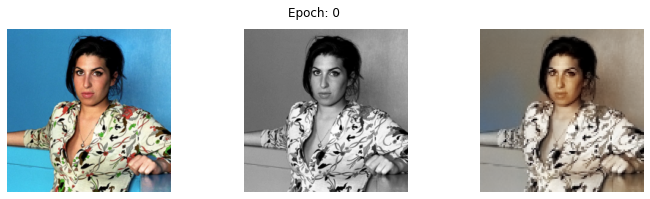

In [22]:
learn.fit_one_cycle(1, slice(1e-6,1e-4), callbacks=[DisplayResultsCallback(learn, dir_data/'winehouse.png')])

In [23]:
learn.save('stage2b')

Stage 3

In [24]:
data, learn = _get_data_learn(batch_size=16, sz=224)

In [25]:
learn.load('stage2b');

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


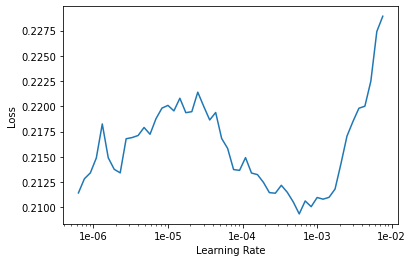

In [26]:
learn.lr_find()
learn.recorder.plot()

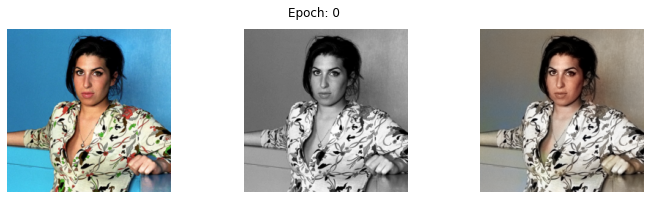

In [27]:
learn.fit_one_cycle(1, slice(1e-4), callbacks=[DisplayResultsCallback(learn, dir_data/'winehouse.png')])

In [28]:
learn.save('stage3a')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


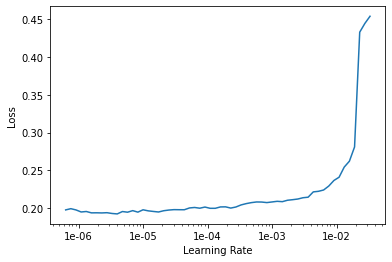

In [29]:
learn.load('stage3a')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

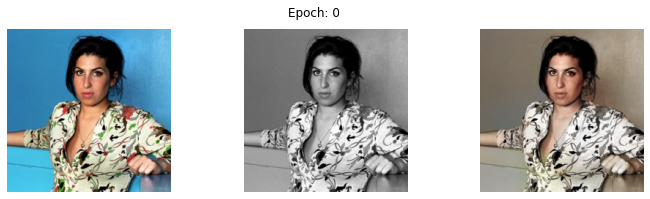

In [30]:
learn.fit_one_cycle(1, slice(1e-6,1e-4), callbacks=[DisplayResultsCallback(learn, dir_data/'winehouse.png')])

In [31]:
learn.save('stage3b')

Try some final iterations

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


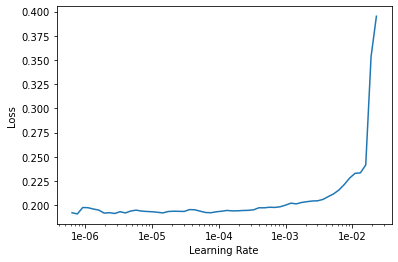

In [32]:
learn.load('stage3b')
learn.unfreeze()
learn.lr_find()
learn.recorder.plot()

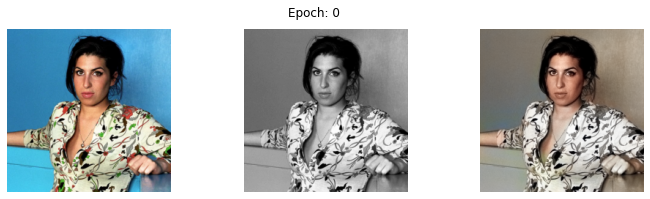

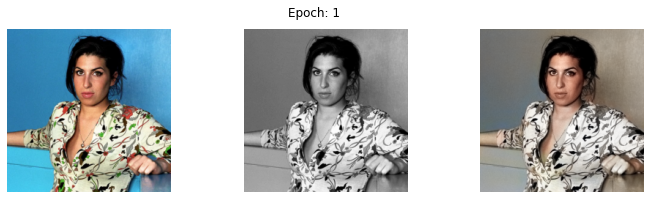

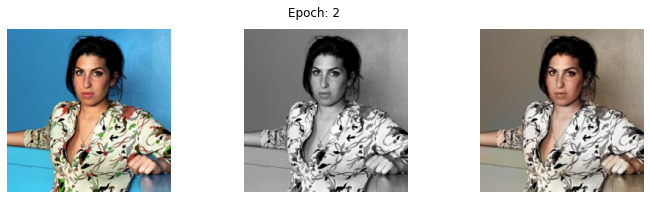

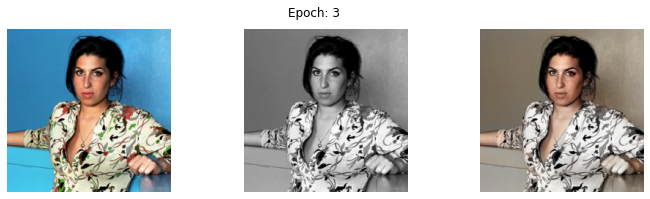

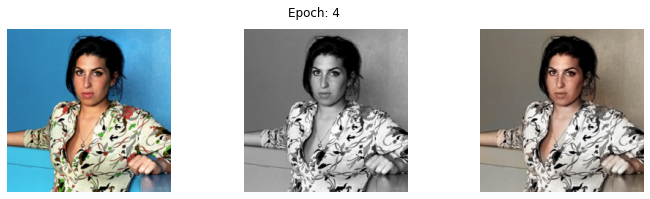

In [33]:
learn.fit(5, 1e-5, callbacks=[DisplayResultsCallback(learn, dir_data/'winehouse.png')])

In [34]:
learn.save('stage4')

Try very low learning rate with small weight decay

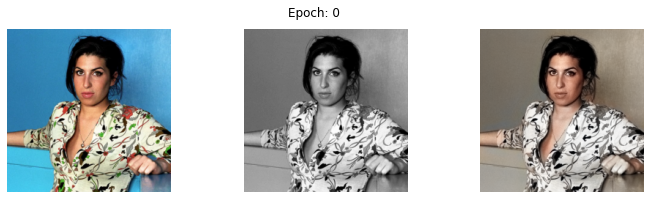

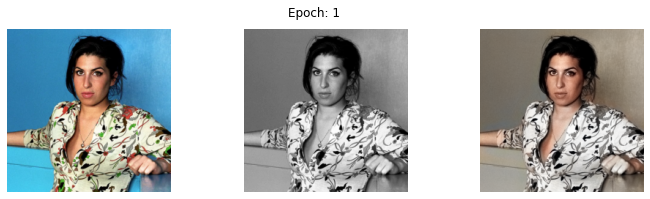

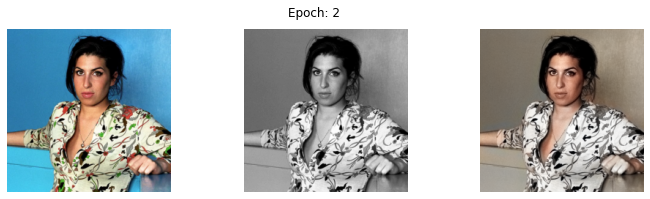

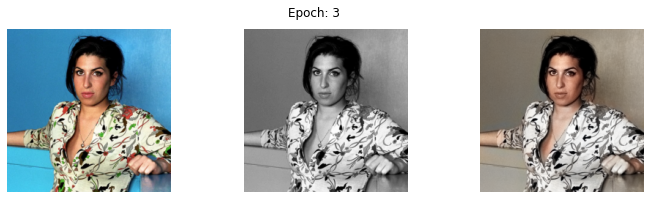

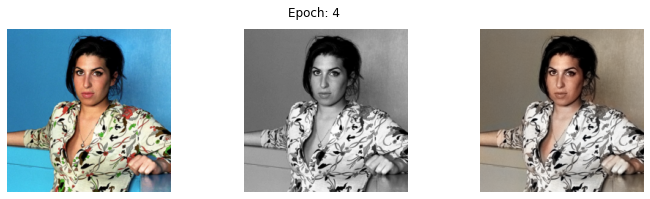

In [37]:
learn.fit(5, 1e-6, callbacks=[DisplayResultsCallback(learn, dir_data/'winehouse.png')], wd=1e-5)

In [38]:
learn.save('stage5')

# Test

In [9]:
data, learn = _get_data_learn(batch_size=16, sz=224)
learn.load('stage5');

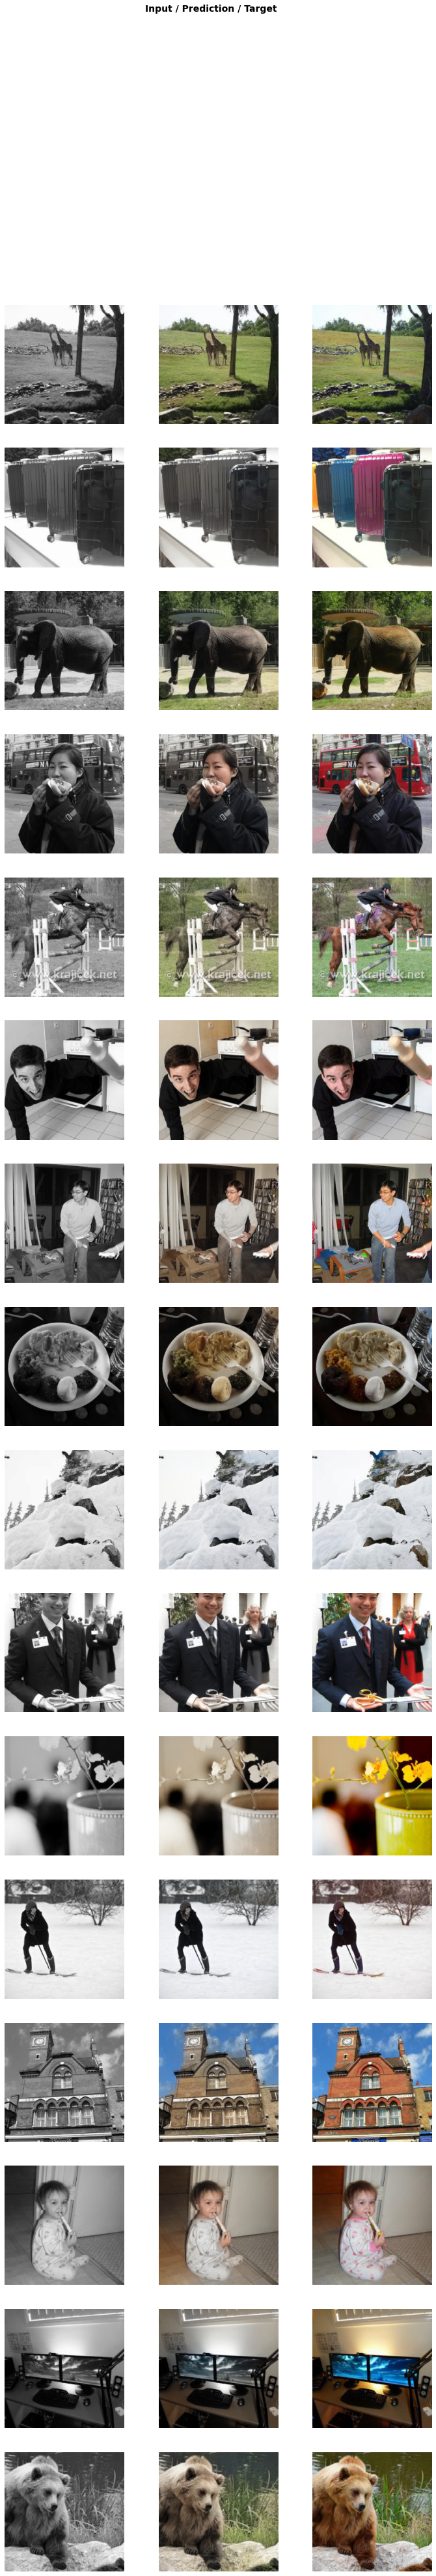

In [10]:
learn.show_results(rows=50)